# Lab 4 - Hypothesis testing and statistical analysis

Please read this to the end before starting. There is important information towards the end.

## Get the data (1 mark)

The data is `census11sample.csv`. Download it from BlackBoard. You can also get it from <href = 'https://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv'>http://syllabus.cs.man.ac.uk/ugt/2021/COMP13212/spam.csv>. Read it into a DataFrame.

This data consists of samples of ages from the 2011 census in England for different regions. Each data point is the age at the last birthday of an individual. So, a zero is a person who has not reached their first birthday, a 35 is a person who is 35 years old, and so on. The exception is that the age 100 really means between 100 and 114. Apparently, the Office for National Statistics filtered out everyone over 114. There is a sample of 1000 individual ages for each of nine regions. The data is derived from the Office for National Statistics: 2011 Census aggregate data. UK Data Service (Edition: February 2017). DOI: http://dx.doi.org/10.5257/census/aggregate-2011-2, but was taken from the InFuse website, http://infuse2011.ukdataservice.ac.uk. The samples were sampled from this data by Jonathan Shapiro.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
columns = ["Index", "North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West"]
censuspdf = pd.read_csv("census11sample.csv",names=columns,skiprows = 1)
censuspdf = censuspdf.drop(columns=['Index'])
censuspdf

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
5,27,26,66,70,33,41,38,78,63
6,42,44,49,59,40,65,13,8,52
7,62,44,41,76,8,74,54,40,72
8,34,17,33,71,45,73,1,77,75
9,15,46,37,3,13,41,19,47,69


## Divide the data (2 marks)

You are going to explore this data and from your explorations devise a hypothesis to test. Once you generate a hypothesis, you need a fresh set of data on which to test it. If you use the same data, it is biased in favor of your hypothesis. So, split the data in to two parts, a set for exploration and hythesis generation, and a set on which to test the hypothesis. In what follows, I will call the two sets: sample_explore and sample_test. (You can call them whatever you want.)

divide them into two tables by odd index and even index


In [3]:
odd_pdf = censuspdf.iloc[1::2]
even_pdf = censuspdf.iloc[0::2]

In [4]:
odd_pdf

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
1,10,36,40,19,52,46,58,87,40
3,33,63,25,60,9,26,30,52,74
5,27,26,66,70,33,41,38,78,63
7,62,44,41,76,8,74,54,40,72
9,15,46,37,3,13,41,19,47,69
11,51,31,21,29,7,31,28,14,47
13,46,24,39,5,52,73,1,50,83
15,40,36,58,62,82,40,20,33,84
17,40,14,70,33,22,1,66,63,45
19,55,73,94,66,13,46,35,6,18


In [5]:
even_pdf

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
2,82,53,60,34,2,29,18,46,57
4,55,98,4,47,58,37,18,67,19
6,42,44,49,59,40,65,13,8,52
8,34,17,33,71,45,73,1,77,75
10,51,55,53,64,15,48,35,60,61
12,49,20,73,77,93,90,28,11,65
14,65,67,35,65,67,85,40,24,7
16,34,19,52,68,37,48,15,1,12
18,10,70,20,23,48,26,15,38,45


## Explore the data (5 marks)

Explore dataset sample_explore. Measure descriptive statistics, plot histograms, scatterplots, and whatever. Find something interesting in the data, and generate a hypothesis about it. Remember, a hypothesis is a statement which is true or false, and can be falsefied.  

In [6]:
odd_copy = odd_pdf.copy()
odd_copy

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
1,10,36,40,19,52,46,58,87,40
3,33,63,25,60,9,26,30,52,74
5,27,26,66,70,33,41,38,78,63
7,62,44,41,76,8,74,54,40,72
9,15,46,37,3,13,41,19,47,69
11,51,31,21,29,7,31,28,14,47
13,46,24,39,5,52,73,1,50,83
15,40,36,58,62,82,40,20,33,84
17,40,14,70,33,22,1,66,63,45
19,55,73,94,66,13,46,35,6,18


In [7]:
column_mean = odd_pdf.mean()
column_var = odd_pdf.var()
column_std = odd_pdf.std()
q1_odd = odd_pdf.quantile(0.25)
q3_odd = odd_pdf.quantile(0.75)
column_IQR = q3_odd - q1_odd

In [8]:
odd_copy.loc['mean'] = column_mean
odd_copy.loc['variance'] = column_var
odd_copy.loc['standard deviation'] = column_std
odd_copy.loc['IQR'] = column_IQR
odd_copy

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
1,10.000000,36.000000,40.000000,19.000000,52.000000,46.000000,58.000000,87.000000,40.000000
3,33.000000,63.000000,25.000000,60.000000,9.000000,26.000000,30.000000,52.000000,74.000000
5,27.000000,26.000000,66.000000,70.000000,33.000000,41.000000,38.000000,78.000000,63.000000
7,62.000000,44.000000,41.000000,76.000000,8.000000,74.000000,54.000000,40.000000,72.000000
9,15.000000,46.000000,37.000000,3.000000,13.000000,41.000000,19.000000,47.000000,69.000000
11,51.000000,31.000000,21.000000,29.000000,7.000000,31.000000,28.000000,14.000000,47.000000
13,46.000000,24.000000,39.000000,5.000000,52.000000,73.000000,1.000000,50.000000,83.000000
15,40.000000,36.000000,58.000000,62.000000,82.000000,40.000000,20.000000,33.000000,84.000000
17,40.000000,14.000000,70.000000,33.000000,22.000000,1.000000,66.000000,63.000000,45.000000
19,55.000000,73.000000,94.000000,66.000000,13.000000,46.000000,35.000000,6.000000,18.000000


In [9]:
odd_pdf

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
1,10,36,40,19,52,46,58,87,40
3,33,63,25,60,9,26,30,52,74
5,27,26,66,70,33,41,38,78,63
7,62,44,41,76,8,74,54,40,72
9,15,46,37,3,13,41,19,47,69
11,51,31,21,29,7,31,28,14,47
13,46,24,39,5,52,73,1,50,83
15,40,36,58,62,82,40,20,33,84
17,40,14,70,33,22,1,66,63,45
19,55,73,94,66,13,46,35,6,18


In [10]:
import matplotlib.pyplot as plt

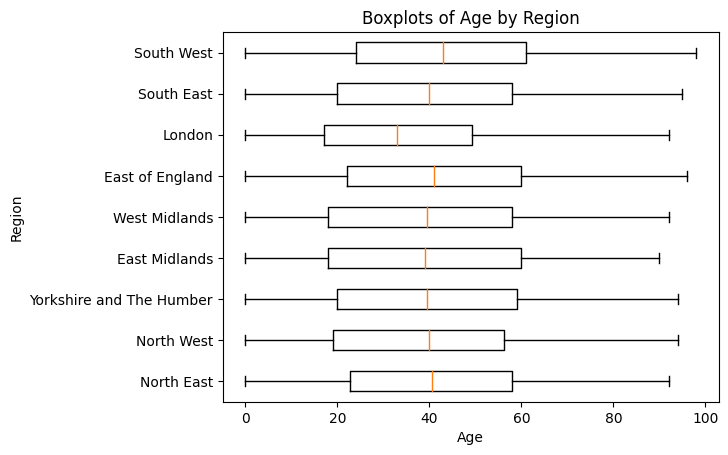

In [11]:
plt.boxplot([odd_pdf[col] for col in odd_pdf.columns], labels=odd_pdf.columns, vert=False)
plt.title('Boxplots of Age by Region')
plt.xlabel('Age')
plt.ylabel('Region')
plt.show()

In [12]:
odd_pdf.describe()

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,40.784000,39.282000,39.872000,39.678000,39.216000,41.394000,34.616000,39.738000,42.880000
std,23.332083,23.060747,23.587462,24.114006,23.444929,23.338211,21.979325,23.181028,24.027072
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.750000,19.000000,20.000000,18.000000,18.000000,22.000000,17.000000,20.000000,24.000000
50%,40.500000,40.000000,39.500000,39.000000,39.500000,41.000000,33.000000,40.000000,43.000000
75%,58.000000,56.250000,59.000000,60.000000,58.000000,60.000000,49.250000,58.000000,61.000000
max,92.000000,94.000000,94.000000,90.000000,92.000000,96.000000,92.000000,95.000000,98.000000


## State your hypothesis, and state the evidence that justifies it. (2 marks)

 hypothesis: The demographic in London is noticeably younger than in any other region
 Evidence: From the set 'odd_copy', Mean in London is much more less than other region. Also through the Boxplots, it shows London has lower IQR, lower median

## Plan the test. (3 marks)

State how you plan to test the hypothesis briefly. State the null hypothesis and the probability level at which you will role it out (95%, 99%, etc.).

Null hypothesis (H0) : There is no difference between age in London and the ages in other regions
<br>Alternative hypothesis (H1): London has a significantly lower age compared to other regions.
<br>（α = 0.01）

## Perform the statistical test of the hypothesis. (5 marks)

You may do this using classical statistical methods, Bayesian methods, or, if you are uncomfortable with the notion that the data is normally distributed, you can use Monte Carlo (bootstrap) sampling. 

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
alpha = 0.01
data_london = even_pdf["London"]# set London as a single set
data_other = pd.concat([even_pdf[column] for column in even_pdf.columns if column !="London"])
other_mean = np.mean(data_other)
london_mean = np.mean(data_london)
t_stat, p_value = ttest_ind(data_london, data_other)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"London Mean Age: {london_mean}")
print(f"Other Regions Mean Age: {other_mean}")


### in this case, P-value: 0.006779493415033639 < alpha: 0.01
### also London mean: 37.222  < Other Regions Mean: 40.22

In [ ]:
from scipy.stats import norm

other_mean = np.mean(data_other)
other_std = np.std(data_other)

other_dist = norm(loc=other_mean, scale=other_std)

age_range = np.linspace(min(min(data_london), min(data_other)), max(max(data_london), max(data_other)), 100)

other_pdf = other_dist.pdf(age_range)

plt.plot(age_range, other_pdf, label="Other Regions Normal Distribution", linewidth=2)

plt.title("Age Distributions for London and Other Regions")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
from scipy.stats import t, sem

len_london = len(data_london)
len_other = len(data_other)
degrees_of_freedom = len_london + len_other - 2

alpha = 0.01
critical_t_value = t.ppf(1 - alpha, degrees_of_freedom)

x = np.linspace(-5, 5, 1000)
y = t.cdf(x, degrees_of_freedom)

plt.plot(x, y, label="CDF of t-distribution")
plt.axvline(-critical_t_value, color='red', linestyle='--', label=f"-Critical t-value ({-critical_t_value:.2f})")
plt.axvline(t_stat, color='green', linestyle='-', label=f"Observed t-statistic ({t_stat:.2f})")

plt.xlabel("t-value")
plt.ylabel("CDF")
plt.legend()
plt.title("CDF of t-distribution and Critical Value")
plt.grid()
plt.show()

## Conclusions. (2 Marks) 

Write out your conclusion completely, but in a single sentence. E.g. "Using the method of XXX, I find that the null hypothesis is/cannot be ruled out at Y percent level." 

Conclusions:  Using the method of T-test, I find that the null hypothesis cannot be ruled out at 99% percent level.